<a href="https://colab.research.google.com/github/varun-raj-11/05FEBASSQ/blob/main/PracticalLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intellipaat/ML_2nd_July/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Text(0.5, 1.0, 'Profit vs R&D Spend')

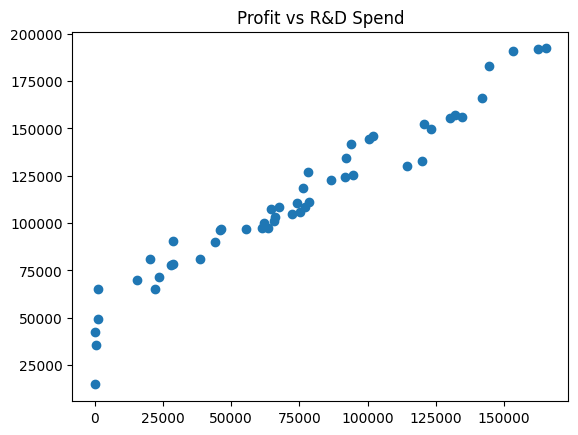

In [ ]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('Profit vs R&D Spend')

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Text(0.5, 1.0, 'Profit vs Administration')

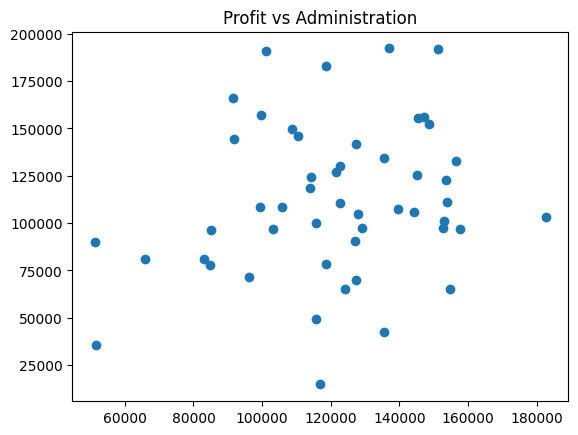

In [ ]:
plt.scatter(df['Administration'], df['Profit'])
plt.title('Profit vs Administration')

Text(0.5, 1.0, 'Profit vs Marketing Spend')

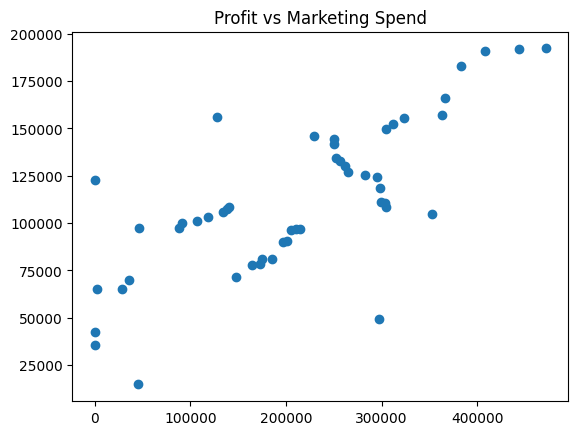

In [ ]:
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Profit vs Marketing Spend')

In [ ]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [ ]:
df['NY'] = np.where(df['State'] == 'New York', 1, 0)
df['CL'] = np.where(df['State'] == 'California', 1, 0)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NY,CL
0,165349.20,136897.80,471784.10,New York,192261.83,1,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0


In [ ]:
df.drop(columns = ['State'], axis = 1, inplace = True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NY,CL
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0


In [ ]:
Target = 'Profit'

In [ ]:
df1 = df.drop(columns = [Target], axis = 1)
independent_var = df1.columns

In [ ]:
df1.head()

,R&D Spend,Administration,Marketing Spend,NY,CL
0,165349.20,136897.80,471784.10,1,0
1,162597.70,151377.59,443898.53,0,1
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,1,0
4,142107.34,91391.77,366168.42,0,0


In [ ]:
independent_var

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'NY', 'CL'], dtype='object')

In [ ]:
X = df[independent_var].values
y = df[Target].values

In [ ]:
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        0.00

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
Xtrain = scale.fit_transform(Xtrain)
Xtest = scale.fit_transform(Xtest)

In [ ]:
Xtrain

array([[0.56766982, 0.57883556, 0.52956308, 0.        , 0.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.        , 0.        ],
       [0.26652654, 0.        , 0.41762624, 0.        , 1.        ],
       [0.72901786, 0.74173276, 0.66049977, 1.        , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 1.        , 0.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 1.        ],
       [0.16869099, 0.25446874, 0.34861436, 0.        , 0.        ],
       [0.00795565, 0.49125975, 0.62976785, 0.        , 0.        ],
       [0.        , 0.64054682, 0.        , 0.        , 1.        ],
       [0.69261666, 0.54302973, 0.55486446, 1.        , 0.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 1.        ],
       [0.47180821, 0.53527036, 0.56031151, 0.        , 1.        ],
       [0.46594728, 0.3653876 , 0.29796428, 1.        , 0.        ],
       [0.2807759 , 0.81005496, 0.44680961, 0.        , 1.        ],
       [0.36974101, 0.77205322, 0.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
regressor.intercept_

51439.174002917316

In [ ]:
independent_var

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'NY', 'CL'], dtype='object')

In [ ]:
regressor.coef_

array([133210.28653155,  -9036.14268303,  14085.32326907,   -931.80524618,
         -938.79300615])

In [ ]:
y_pred_train = regressor.predict(Xtrain)

In [ ]:
ytrain

array([141585.52, 166187.94,  89949.14, 152211.77, 182901.99, 156122.51,
        77798.83,  49490.75,  42559.73, 129917.04, 149759.96, 126992.93,
       108552.04,  96712.8 ,  97483.56, 192261.83,  65200.33, 105008.31,
        96778.92, 156991.12, 101004.64, 144259.4 ,  90708.19, 191792.06,
       111313.02, 191050.39,  69758.98,  96479.51, 108733.99,  78239.91,
       146121.95, 110352.25, 124266.9 ,  14681.4 , 118474.03, 155752.6 ,
        71498.49, 132602.65, 103282.38,  81229.06])

In [ ]:
y_pred_train

array([129287.25932268, 174098.25202606,  91886.85822604, 150220.99659011,
       173623.19035616, 156165.84489947,  76521.47893717,  56930.33870602,
        44712.3085635 , 145679.58311302, 155019.87822287, 116405.47712513,
       113471.56812701,  86876.30432577,  95418.08570235, 191913.7274038 ,
        62092.25276442, 113876.00520371,  98993.33790342, 164246.36680458,
        99560.68684705, 136274.54962586,  75324.0220735 , 187861.47839007,
       115558.98201737, 183805.40426665,  58825.43932911,  91390.89209802,
       111197.68506734,  74197.75183475, 136305.2407773 , 115188.84018874,
       129833.75780392,  47329.63344539, 116544.51129346, 159597.70047229,
        70875.84128325, 148486.45402739,  99143.48842753,  71327.34640771])

In [ ]:
ytest

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [ ]:
y_pred_test = regressor.predict(Xtest)

In [ ]:
y_pred_test

array([185097.15605806, 110258.19897911, 137287.90281961,  44821.57731661,
       189515.9070124 ,  50507.36875674, 155770.69909059, 140339.81196656,
       134900.03097307, 163022.23274156])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_pred_train, ytrain)

0.951454437027275

In [ ]:
r2_score(y_pred_test, ytest)

0.27977536505296996

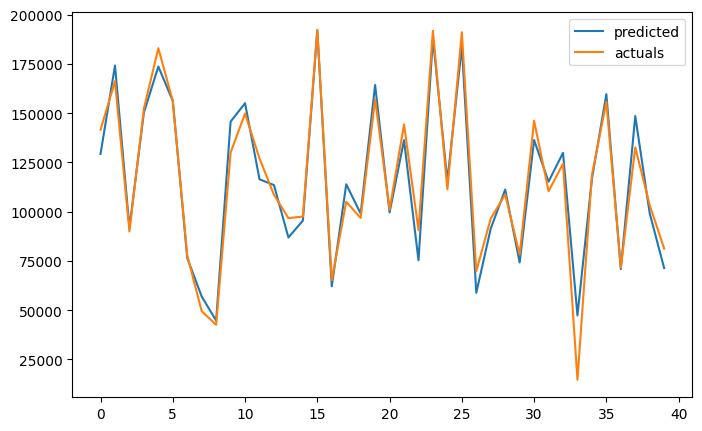

In [ ]:
# y_pred_test, y_test
plt.figure(figsize = (8,5))
plt.plot(y_pred_train)
plt.plot(np.array(ytrain))
plt.legend(['predicted', 'actuals'])

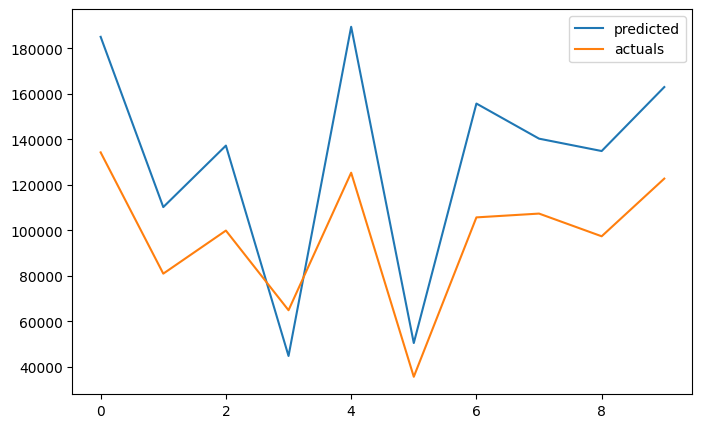

In [ ]:
# y_pred_test, y_test
plt.figure(figsize = (8,5))
plt.plot(y_pred_test)
plt.plot(np.array(ytest))
plt.legend(['predicted', 'actuals'])

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha = 0.1, max_iter = 3000)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
L_y_pred_train = lasso.predict(Xtrain)
# L_y_pred_test = lasso.predict(Xtest)

In [ ]:
L_y_pred_test = lasso.predict(Xtest)

In [ ]:
r2_score(L_y_pred_train, ytrain)
# r2_score(L_y_pred_test, ytest)

0.9514547413688007

In [ ]:
r2_score(L_y_pred_test, ytest)

0.279745837038199

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso1 = Lasso()
parameters = {'alpha': [1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1, 3, 5, 7, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500],
              'max_iter': [2000, 3000, 4000, 5000, 6000]}
lasso_regressor = GridSearchCV(lasso1, parameters, scoring = 'neg_mean_squared_error', cv = 3)
lasso_regressor.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+09, tolerance: 4.431e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+09, tolerance: 4.222e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.277e+08, tolerance: 4.966e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-11, 1e-09, 1e-07, 1e-05,
                                   0.001, 0.1, 1, 3, 5, 7, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90, 100, 200, 300, 500],
                         'max_iter': [2000, 3000, 4000, 5000, 6000]},
             scoring='neg_mean_squared_error')

In [ ]:
L1_y_pred_train = lasso_regressor.predict(Xtrain)
L1_y_pred_test = lasso_regressor.predict(Xtest)

In [ ]:
r2_score(L_y_pred_train, ytrain)

0.9514547413688007

In [ ]:
r2_score(L_y_pred_test, ytest)

0.279745837038199

In [ ]:
lasso_regressor.best_params_

{'alpha': 500, 'max_iter': 2000}